In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
import pandas as pd
import numpy as np
from scipy import stats

# Create a sample dataset
data = {
    'Student ID': [1, 2, 3, 4, 5, 6, 7, 8, 9, 10],
    'Gender': ['Male', 'Female', 'Male', 'Male', 'Female', 'Female', 'Male', 'Female', 'Male', 'Female'],
    'Age': [19, 20, np.nan, 18, 22, 23, 20, 19, np.nan, 21],
    'Study Hours': [6, 5, 7, 8, 4, 2, 9, np.nan, 7, 3],
    'Test Score': [85, 90, 78, 92, 65, 80, 98, 88, 75, 81],
    'Grade': ['B', 'A', 'C', 'A', 'C', 'B', 'A', 'B', 'C', 'B']
}

df = pd.DataFrame(data)

# Step 1: Handling missing values and inconsistencies
df['Age'].fillna(df['Age'].mean(), inplace=True)
df['Study Hours'].fillna(df['Study Hours'].mean(), inplace=True)

# Step 2: Handling outliers
q1 = df['Study Hours'].quantile(0.25)
q3 = df['Study Hours'].quantile(0.75)
iqr = q3 - q1
threshold = 1.5 * iqr

df = df[(df['Study Hours'] >= q1 - threshold) & (df['Study Hours'] <= q3 + threshold)]

# Step 3: Data transformation - Changing scale
df['Test Score'] = np.log(df['Test Score'])

# Print the updated dataset
print(df)


   Student ID  Gender    Age  Study Hours  Test Score Grade
0           1    Male  19.00     6.000000    4.442651     B
1           2  Female  20.00     5.000000    4.499810     A
2           3    Male  20.25     7.000000    4.356709     C
3           4    Male  18.00     8.000000    4.521789     A
4           5  Female  22.00     4.000000    4.174387     C
5           6  Female  23.00     2.000000    4.382027     B
6           7    Male  20.00     9.000000    4.584967     A
7           8  Female  19.00     5.666667    4.477337     B
8           9    Male  20.25     7.000000    4.317488     C
9          10  Female  21.00     3.000000    4.394449     B


In [3]:
df=pd.read_csv("StudentsPerformance.csv")

In [4]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,1,Pune
1,female,69,90,88.0,NaN,2,na
2,female,90,95,93.0,74.0,2,Nashik
3,male,47,57,NaN,78.0,1,Na
4,male,na,78,75.0,81.0,3,Pune
5,female,71,Na,78.0,70.0,4,na
6,male,12,44,52.0,12.0,2,Nashik
7,male,NaN,65,67.0,49.0,1,Pune
8,male,5,77,89.0,55.0,0,NaN


In [5]:
df.isnull().sum()

gender                   0
math score               1
reading score            0
writing score            1
Placement Score          1
placement offer count    0
Region                   1
dtype: int64

In [6]:
df.dtypes

gender                    object
math score                object
reading score             object
writing score            float64
Placement Score          float64
placement offer count      int64
Region                    object
dtype: object

<Axes: xlabel='placement offer count', ylabel='gender'>

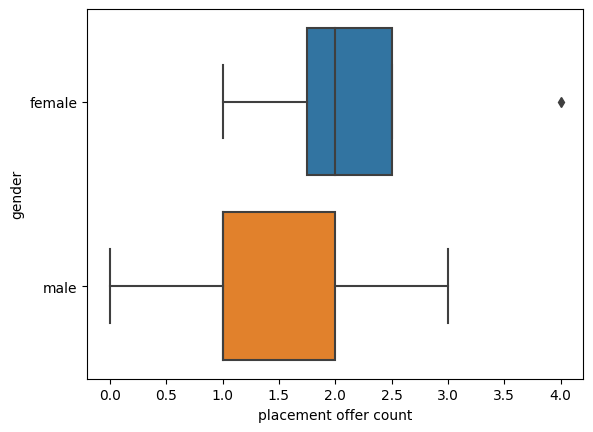

In [7]:
sns.boxplot(x='placement offer count',y='gender',data=df)

In [8]:
df['placement offer count']=np.log(df['placement offer count']+1)

In [9]:
df


,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,0.693147,Pune
1,female,69,90,88.0,NaN,1.098612,na
2,female,90,95,93.0,74.0,1.098612,Nashik
3,male,47,57,NaN,78.0,0.693147,Na
4,male,na,78,75.0,81.0,1.386294,Pune
5,female,71,Na,78.0,70.0,1.609438,na
6,male,12,44,52.0,12.0,1.098612,Nashik
7,male,NaN,65,67.0,49.0,0.693147,Pune
8,male,5,77,89.0,55.0,0.000000,NaN


In [10]:
Q1=df['Placement Score'].quantile(0.25)
Q3=df['Placement Score'].quantile(0.75)
IQR=Q3-Q1



In [11]:
lower_bound=Q1-1.5*IQR
upper_bound=Q3+1.5*IQR

In [12]:
df=df[(df['Placement Score']>=lower_bound) & (df['Placement Score']<=upper_bound)]

In [13]:
df

,gender,math score,reading score,writing score,Placement Score,placement offer count,Region
0,female,72,72,74.0,78.0,0.693147,Pune
2,female,90,95,93.0,74.0,1.098612,Nashik
3,male,47,57,NaN,78.0,0.693147,Na
4,male,na,78,75.0,81.0,1.386294,Pune
5,female,71,Na,78.0,70.0,1.609438,na
7,male,NaN,65,67.0,49.0,0.693147,Pune
8,male,5,77,89.0,55.0,0.000000,NaN
